# Visualisation of cleaned We Rate Dogs Data

## Introduction

Now the data has been cleaned we can start to take a look at the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
%matplotlib inline 

In [2]:
# read in the cleaned dataframe
df_dogs = pd.read_csv('twitter_archive_master.csv',encoding='utf-8', index_col=0)

In [3]:

df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 0 to 1643
Data columns (total 12 columns):
tweet_id              1644 non-null int64
timestamp             1644 non-null object
source                1644 non-null object
text                  1644 non-null object
rating_numerator      1644 non-null int64
rating_denominator    1644 non-null int64
name                  1644 non-null object
dog_stage             1644 non-null object
confidence            1644 non-null float64
prediction            1644 non-null object
favorite_count        1644 non-null int64
retweet_count         1644 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 167.0+ KB


Still need to do some minor cleaning again, as we're reloading from a csv we've lost the datetime object, everything else seems ok

In [4]:
df_dogs['timestamp'] = df_dogs['timestamp'].apply(lambda time_string:dt.strptime(time_string,"%Y-%m-%d %H:%M:%S"))

In [5]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 0 to 1643
Data columns (total 12 columns):
tweet_id              1644 non-null int64
timestamp             1644 non-null datetime64[ns]
source                1644 non-null object
text                  1644 non-null object
rating_numerator      1644 non-null int64
rating_denominator    1644 non-null int64
name                  1644 non-null object
dog_stage             1644 non-null object
confidence            1644 non-null float64
prediction            1644 non-null object
favorite_count        1644 non-null int64
retweet_count         1644 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 167.0+ KB


Ok, now we're ready to start exploring the data visually

## Summary Statistics

In [27]:
df_numerical = df_dogs[['rating_numerator','rating_denominator','confidence','favorite_count','retweet_count']]
df_numerical.describe()

,rating_numerator,rating_denominator,confidence,favorite_count,retweet_count
count,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000
mean,11.402676,10.479927,0.550621,9165.175182,2763.732360
std,7.531610,6.382623,0.298872,13024.467844,4857.508545
min,0.000000,7.000000,0.000010,79.000000,13.000000
25%,10.000000,10.000000,0.304720,2105.500000,624.000000
50%,11.000000,10.000000,0.549706,4287.500000,1379.500000
75%,12.000000,10.000000,0.822062,11450.000000,3153.250000
max,165.000000,150.000000,0.999956,143667.000000,77530.000000


## Univariate plots

### Distribution of ratings

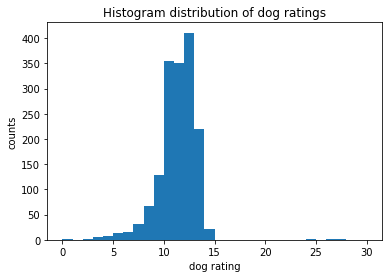

In [6]:
plt.hist(df_dogs['rating_numerator'], bins=30,range=(0,30))
plt.title("Histogram distribution of dog ratings")
plt.xlabel('dog rating')
plt.ylabel('counts')
plt.show()

The plot shows a negative skewed distribution, most pictures were rated quite high which was part of the fun nature of the project. We can also look at this distribution divided by the numerator (there were cases where the numberator was not 10)

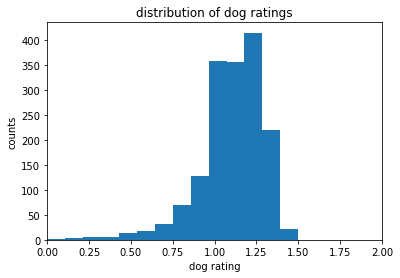

In [7]:
df_dogs['scores'] = df_dogs['rating_numerator']/df_dogs['rating_denominator']
plt.hist(df_dogs['scores'] , bins=70)
plt.xlabel('dog rating')
plt.ylabel('counts')
plt.title('distribution of dog ratings')
plt.xlim(0,2)
plt.show()

### Distribution of ratings

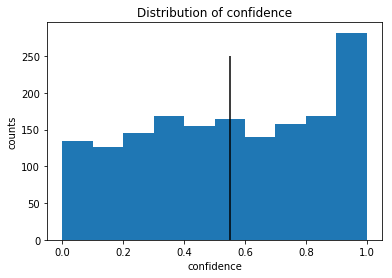

In [34]:
plt.hist(df_dogs['confidence'])
plt.title("Distribution of confidence")
plt.xlabel('confidence')
plt.ylabel('counts')
plt.vlines(df_dogs['confidence'].median(), ymin=0, ymax=250)

plt.show()

The distribution of confidence shows mostly a uniform distribution except there is a peak around 0.9. The median value is aorund 0.55 shown in black so more than half of the predictions were quite confident on the prediction.

## Bivariate Analysis

### Favorite Count vs Retweet Count

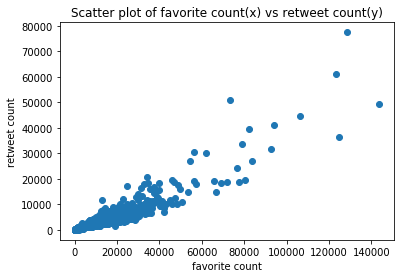

In [36]:
plt.scatter(x=df_dogs['favorite_count'],y=df_dogs['retweet_count'])
plt.xlabel('favorite count')
plt.ylabel('retweet count')
plt.title('Scatter plot of favorite count(x) vs retweet count(y)')
plt.show()

There is a linear relationship with the number of times a tweet has been favourited and the number of times it has been retweeted. 

In [10]:
def remove_outliers(data):
    # removes all data 3 x sd of the dataset
    outlier_threshold = 3 * np.std(data)
    no_outliers = [x for x in data if np.absolute(x) < outlier_threshold]
    return np.array(no_outliers)

# allows you to group dog stages and split your numerical property/attribute of interest into groups by dog stage, makes it easier to
# analyse them against each other
def dog_stage_vs_property(_property, _remove_outliers=False):
    dog_stages = list(df_dogs['dog_stage'].unique())
    dog_stages.remove('None')

    dog_stage_dict = {ds:[] for ds in dog_stages}

    for dog_stage in dog_stages:
        # get the retweet counts
        dog_stage_dict[dog_stage] = np.array(list(df_dogs[df_dogs['dog_stage']==dog_stage][_property]))
        
        if(_remove_outliers==True):
            dog_stage_dict[dog_stage] = remove_outliers(dog_stage_dict[dog_stage])
    
    return dog_stage_dict    

## Boxplots

###  Boxpot of dog stages

#### Dog stage vs retweet count

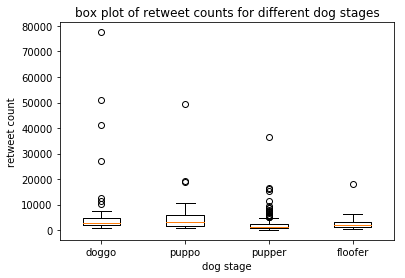

In [38]:
dog_data_retweets = dog_stage_vs_property('retweet_count', _remove_outliers=False)
retweet_values = [x for x in dog_data_retweets.values()]
dog_data_retweets_keys = dog_data_retweets.keys()
plt.boxplot(retweet_values, labels=dog_data_retweets_keys)
plt.xlabel('dog stage')
plt.ylabel('retweet count')
plt.title('box plot of retweet counts for different dog stages')
plt.show()

The distributions all look squashed, so will have to zoom in

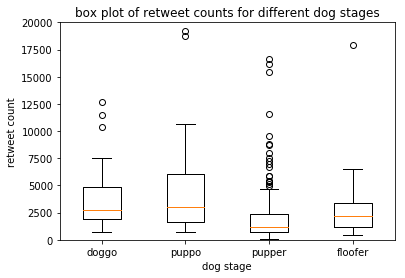

In [41]:
plt.boxplot(retweet_values, labels=dog_data_retweets_keys)
plt.xlabel('dog stage')
plt.ylabel('retweet count')
plt.title('box plot of retweet counts for different dog stages')
plt.ylim(0,20000)
plt.show()

There were a lot of outliers for doggo and received the highest retweets. Puppo had the highest median value for retweets which was just over 2500. Doggos are generally popular amongst the internet community after doge became a popular internet meme and even inspired an entire cryptocurrency

#### Dog stage vs Favorite count

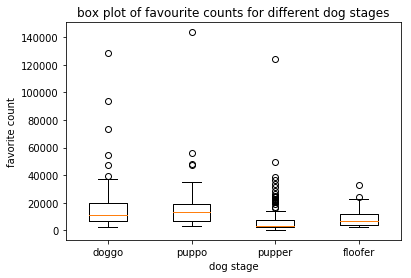

In [42]:
dog_data_favs = dog_stage_vs_property('favorite_count', _remove_outliers=False)
fav_values = [x for x in dog_data_favs.values()]
plt.boxplot(fav_values, labels=dog_data_favs.keys())
plt.xlabel('dog stage')
plt.ylabel('favorite count')
plt.title('box plot of favourite counts for different dog stages')
plt.show()

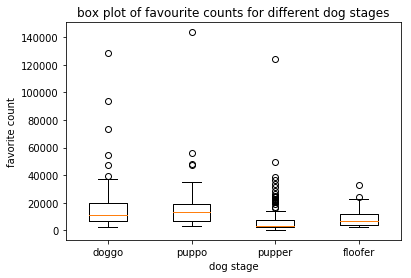

In [43]:
plt.boxplot(fav_values, labels=dog_data_favs.keys())
plt.xlabel('dog stage')
plt.ylabel('favorite count')
plt.title('box plot of favourite counts for different dog stages')
plt.show()

The distributions for individual dog stages for favorites were very similar to retweets

#### Dog stage vs Scores

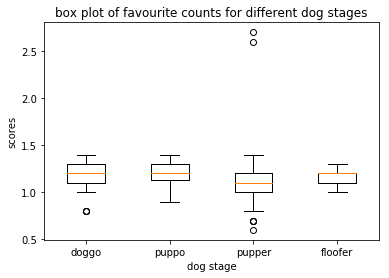

In [13]:
dog_data_scores = dog_stage_vs_property('scores', _remove_outliers=False)
plt.boxplot([x for x in dog_data_scores.values()], labels=dog_data_scores.keys())
plt.xlabel('dog stage')
plt.ylabel('scores')
plt.title('box plot of favourite counts for different dog stages')
plt.show()

It seems most dogs got similar scores, we can take a look at this as 

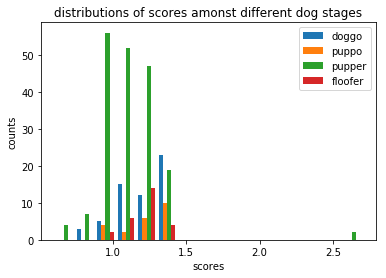

In [81]:
dog_stage_scores = [x[1] for x in dog_data_scores.items()]
plt.hist(dog_stage_scores, bins=15, label=dog_data_scores.keys())
plt.legend()
plt.xlabel('scores')
plt.ylabel('counts')
plt.title('distributions of scores amonst different dog stages')
plt.show()

## Dog names

I'd like to see how what the most common names are for dogs

,name,count
572,None,380
853,a,27
498,Lucy,10
157,Charlie,10
189,Cooper,10


In [82]:
# This will contain names that are not actually names but incorrectly parsed text or null values
dog_name_rank = df_dogs.groupby('name').size().reset_index().rename(columns={0:'count'}).sort_values(by='count',ascending=False)

In [83]:
from functools import reduce
names_to_remove = ['an', 'a','the','None']

# create a query string we can pass to pandas.query from the names_to_remove
query_string_list = ["name==\'{}\'".format(x) for x in names_to_remove]
query_string = reduce(lambda x,y: x + " or " + y, query_string_list)
query_string

"name=='an' or name=='a' or name=='the' or name=='None'"

In [86]:
dog_name_rank_clean = dog_name_rank.drop(dog_name_rank.query(query_string).index)
dog_name_rank_clean.reset_index(inplace=True)

In [17]:
# take the top 10 names
dog_name_rank_top_10= dog_name_rank_clean[0:10]

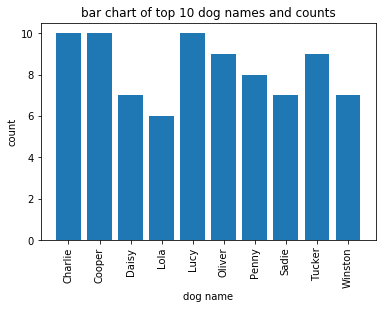

In [18]:
names_count = np.array(dog_name_rank_top_10['count'])
names = list(dog_name_rank_top_10['name'])
plt.bar(height = names_count, x = names)
plt.xticks(rotation=90)
plt.xlabel('dog name')
plt.ylabel('count')
plt.title('bar chart of top 10 dog names and counts')
plt.show()

In [19]:
dog_name_rank_top_10

,index,name,count
0,498,Lucy,10
1,157,Charlie,10
2,189,Cooper,10
3,808,Tucker,9
4,585,Oliver,9
5,608,Penny,8
6,839,Winston,7
7,687,Sadie,7
8,206,Daisy,7
9,486,Lola,6


Above are the most common names used for dogs

###  Favorites over time

I'd like to see how the number of favorites have increased over time while the twitter account has been active.

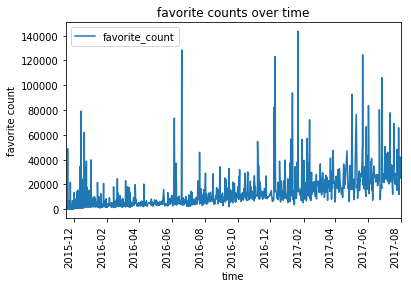

In [20]:
df_dogs.plot(x='timestamp', y='favorite_count')
plt.xlabel('time')
plt.ylabel('favorite count')
plt.title('favorite counts over time')
plt.xticks(rotation=90)
plt.show()

It seems favorite counts have increased over time, this could be due to the popularity of the twitter account over the years so more people are following the account

### Conclusion

I found that there was a correlation with retweet count and favorite count. I can't identify a causal relationship, however it's possible both impact each other. Both will show your followers if you have retweeted or favorited a tweet and hence willr each a wider audience.

I expected larger disparities between different dog stages and favorite/retweet count. Doggo types experience the highest retweets and favorites but the interquartile ranges for all dog stages were very close to each other